## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9771313	total: 59.5ms	remaining: 59.4s
1:	learn: 0.9568358	total: 60.4ms	remaining: 30.1s
2:	learn: 0.9366156	total: 61.4ms	remaining: 20.4s
3:	learn: 0.9195848	total: 62.4ms	remaining: 15.5s
4:	learn: 0.9034675	total: 63.6ms	remaining: 12.7s
5:	learn: 0.8878617	total: 64.7ms	remaining: 10.7s
6:	learn: 0.8725223	total: 65.8ms	remaining: 9.33s
7:	learn: 0.8569365	total: 66.8ms	remaining: 8.28s
8:	learn: 0.8425490	total: 67.7ms	remaining: 7.45s
9:	learn: 0.8272669	total: 68.6ms	remaining: 6.79s
10:	learn: 0.8138819	total: 69.4ms	remaining: 6.24s
11:	learn: 0.7993935	total: 70.2ms	remaining: 5.78s
12:	learn: 0.7847582	total: 71ms	remaining: 5.39s
13:	learn: 0.7707323	total: 71.8ms	remaining: 5.06s
14:	learn: 0.7585488	total: 72.7ms	remaining: 4.77s
15:	learn: 0.7470031	total: 73.5ms	remaining: 4.52s
16:	learn: 0.7358974	total: 74.3ms	remaining: 4.3s
17:	learn: 0.7235650	total: 75.2ms	remaining: 4.1s
18:	learn: 0.7112421	total: 76ms	remaining: 3.92

56:	learn: 0.4400711	total: 107ms	remaining: 1.77s
57:	learn: 0.4357944	total: 108ms	remaining: 1.75s
58:	learn: 0.4327416	total: 109ms	remaining: 1.73s
59:	learn: 0.4285460	total: 109ms	remaining: 1.71s
60:	learn: 0.4248962	total: 110ms	remaining: 1.69s
61:	learn: 0.4211009	total: 111ms	remaining: 1.68s
62:	learn: 0.4185801	total: 112ms	remaining: 1.66s
63:	learn: 0.4152731	total: 113ms	remaining: 1.65s
64:	learn: 0.4125057	total: 113ms	remaining: 1.63s
65:	learn: 0.4090335	total: 114ms	remaining: 1.61s
66:	learn: 0.4053267	total: 115ms	remaining: 1.6s
67:	learn: 0.4014356	total: 116ms	remaining: 1.59s
68:	learn: 0.3986896	total: 117ms	remaining: 1.57s
69:	learn: 0.3951341	total: 117ms	remaining: 1.56s
70:	learn: 0.3918293	total: 118ms	remaining: 1.55s
71:	learn: 0.3886993	total: 119ms	remaining: 1.53s
72:	learn: 0.3859861	total: 120ms	remaining: 1.52s
73:	learn: 0.3824339	total: 121ms	remaining: 1.51s
74:	learn: 0.3796056	total: 121ms	remaining: 1.5s
75:	learn: 0.3769019	total: 122ms

156:	learn: 0.2568779	total: 192ms	remaining: 1.03s
157:	learn: 0.2561860	total: 193ms	remaining: 1.03s
158:	learn: 0.2553945	total: 194ms	remaining: 1.02s
159:	learn: 0.2546049	total: 195ms	remaining: 1.02s
160:	learn: 0.2535486	total: 196ms	remaining: 1.02s
161:	learn: 0.2528754	total: 197ms	remaining: 1.02s
162:	learn: 0.2522680	total: 198ms	remaining: 1.01s
163:	learn: 0.2515271	total: 199ms	remaining: 1.01s
164:	learn: 0.2508671	total: 200ms	remaining: 1.01s
165:	learn: 0.2500938	total: 200ms	remaining: 1.01s
166:	learn: 0.2496203	total: 201ms	remaining: 1s
167:	learn: 0.2488338	total: 202ms	remaining: 1s
168:	learn: 0.2482685	total: 203ms	remaining: 1000ms
169:	learn: 0.2474288	total: 204ms	remaining: 997ms
170:	learn: 0.2467575	total: 205ms	remaining: 994ms
171:	learn: 0.2461549	total: 206ms	remaining: 991ms
172:	learn: 0.2455464	total: 207ms	remaining: 988ms
173:	learn: 0.2449040	total: 208ms	remaining: 985ms
174:	learn: 0.2441221	total: 208ms	remaining: 982ms
175:	learn: 0.243

281:	learn: 0.1838905	total: 297ms	remaining: 756ms
282:	learn: 0.1833353	total: 298ms	remaining: 754ms
283:	learn: 0.1830493	total: 299ms	remaining: 753ms
284:	learn: 0.1825147	total: 299ms	remaining: 751ms
285:	learn: 0.1819495	total: 300ms	remaining: 750ms
286:	learn: 0.1814189	total: 301ms	remaining: 748ms
287:	learn: 0.1808107	total: 302ms	remaining: 747ms
288:	learn: 0.1805567	total: 303ms	remaining: 745ms
289:	learn: 0.1800494	total: 304ms	remaining: 744ms
290:	learn: 0.1794244	total: 305ms	remaining: 742ms
291:	learn: 0.1791315	total: 305ms	remaining: 740ms
292:	learn: 0.1786215	total: 306ms	remaining: 739ms
293:	learn: 0.1781896	total: 307ms	remaining: 737ms
294:	learn: 0.1778346	total: 308ms	remaining: 735ms
295:	learn: 0.1773684	total: 309ms	remaining: 734ms
296:	learn: 0.1771370	total: 309ms	remaining: 732ms
297:	learn: 0.1768331	total: 310ms	remaining: 731ms
298:	learn: 0.1763234	total: 311ms	remaining: 729ms
299:	learn: 0.1758132	total: 312ms	remaining: 728ms
300:	learn: 

384:	learn: 0.1490731	total: 382ms	remaining: 610ms
385:	learn: 0.1489164	total: 383ms	remaining: 609ms
386:	learn: 0.1486094	total: 384ms	remaining: 608ms
387:	learn: 0.1483704	total: 385ms	remaining: 607ms
388:	learn: 0.1481675	total: 385ms	remaining: 605ms
389:	learn: 0.1477285	total: 386ms	remaining: 604ms
390:	learn: 0.1475168	total: 387ms	remaining: 603ms
391:	learn: 0.1472991	total: 388ms	remaining: 602ms
392:	learn: 0.1470247	total: 389ms	remaining: 600ms
393:	learn: 0.1465576	total: 389ms	remaining: 599ms
394:	learn: 0.1462744	total: 390ms	remaining: 598ms
395:	learn: 0.1458947	total: 391ms	remaining: 596ms
396:	learn: 0.1458547	total: 392ms	remaining: 595ms
397:	learn: 0.1454370	total: 393ms	remaining: 594ms
398:	learn: 0.1453502	total: 393ms	remaining: 592ms
399:	learn: 0.1452629	total: 394ms	remaining: 591ms
400:	learn: 0.1451270	total: 395ms	remaining: 590ms
401:	learn: 0.1448974	total: 396ms	remaining: 589ms
402:	learn: 0.1445250	total: 397ms	remaining: 588ms
403:	learn: 

512:	learn: 0.1194685	total: 487ms	remaining: 463ms
513:	learn: 0.1192396	total: 488ms	remaining: 462ms
514:	learn: 0.1190393	total: 489ms	remaining: 461ms
515:	learn: 0.1187743	total: 490ms	remaining: 460ms
516:	learn: 0.1186580	total: 491ms	remaining: 459ms
517:	learn: 0.1184089	total: 492ms	remaining: 458ms
518:	learn: 0.1182364	total: 493ms	remaining: 457ms
519:	learn: 0.1180530	total: 494ms	remaining: 456ms
520:	learn: 0.1178396	total: 494ms	remaining: 455ms
521:	learn: 0.1176932	total: 495ms	remaining: 453ms
522:	learn: 0.1174749	total: 496ms	remaining: 452ms
523:	learn: 0.1172902	total: 497ms	remaining: 451ms
524:	learn: 0.1171920	total: 498ms	remaining: 450ms
525:	learn: 0.1170244	total: 498ms	remaining: 449ms
526:	learn: 0.1168503	total: 499ms	remaining: 448ms
527:	learn: 0.1166218	total: 500ms	remaining: 447ms
528:	learn: 0.1163209	total: 501ms	remaining: 446ms
529:	learn: 0.1161505	total: 502ms	remaining: 445ms
530:	learn: 0.1158628	total: 503ms	remaining: 444ms
531:	learn: 

610:	learn: 0.1020092	total: 571ms	remaining: 364ms
611:	learn: 0.1018241	total: 572ms	remaining: 363ms
612:	learn: 0.1016322	total: 573ms	remaining: 362ms
613:	learn: 0.1014858	total: 574ms	remaining: 361ms
614:	learn: 0.1014090	total: 575ms	remaining: 360ms
615:	learn: 0.1012148	total: 576ms	remaining: 359ms
616:	learn: 0.1010775	total: 576ms	remaining: 358ms
617:	learn: 0.1008941	total: 577ms	remaining: 357ms
618:	learn: 0.1008072	total: 578ms	remaining: 356ms
619:	learn: 0.1006253	total: 579ms	remaining: 355ms
620:	learn: 0.1004567	total: 580ms	remaining: 354ms
621:	learn: 0.1003360	total: 581ms	remaining: 353ms
622:	learn: 0.1001007	total: 581ms	remaining: 352ms
623:	learn: 0.0999304	total: 582ms	remaining: 351ms
624:	learn: 0.0996961	total: 583ms	remaining: 350ms
625:	learn: 0.0996408	total: 584ms	remaining: 349ms
626:	learn: 0.0995193	total: 585ms	remaining: 348ms
627:	learn: 0.0992816	total: 586ms	remaining: 347ms
628:	learn: 0.0991751	total: 587ms	remaining: 346ms
629:	learn: 

740:	learn: 0.0830382	total: 677ms	remaining: 237ms
741:	learn: 0.0828785	total: 678ms	remaining: 236ms
742:	learn: 0.0826842	total: 679ms	remaining: 235ms
743:	learn: 0.0825881	total: 680ms	remaining: 234ms
744:	learn: 0.0825141	total: 681ms	remaining: 233ms
745:	learn: 0.0824531	total: 681ms	remaining: 232ms
746:	learn: 0.0822443	total: 682ms	remaining: 231ms
747:	learn: 0.0820447	total: 683ms	remaining: 230ms
748:	learn: 0.0819371	total: 684ms	remaining: 229ms
749:	learn: 0.0817780	total: 685ms	remaining: 228ms
750:	learn: 0.0816039	total: 685ms	remaining: 227ms
751:	learn: 0.0814932	total: 686ms	remaining: 226ms
752:	learn: 0.0813250	total: 687ms	remaining: 225ms
753:	learn: 0.0811722	total: 688ms	remaining: 224ms
754:	learn: 0.0811365	total: 689ms	remaining: 224ms
755:	learn: 0.0809967	total: 690ms	remaining: 223ms
756:	learn: 0.0808527	total: 690ms	remaining: 222ms
757:	learn: 0.0806894	total: 691ms	remaining: 221ms
758:	learn: 0.0806133	total: 692ms	remaining: 220ms
759:	learn: 

842:	learn: 0.0729413	total: 761ms	remaining: 142ms
843:	learn: 0.0728145	total: 762ms	remaining: 141ms
844:	learn: 0.0727842	total: 763ms	remaining: 140ms
845:	learn: 0.0726572	total: 764ms	remaining: 139ms
846:	learn: 0.0724955	total: 765ms	remaining: 138ms
847:	learn: 0.0724532	total: 766ms	remaining: 137ms
848:	learn: 0.0724337	total: 767ms	remaining: 136ms
849:	learn: 0.0724188	total: 768ms	remaining: 135ms
850:	learn: 0.0723113	total: 769ms	remaining: 135ms
851:	learn: 0.0722009	total: 769ms	remaining: 134ms
852:	learn: 0.0721339	total: 770ms	remaining: 133ms
853:	learn: 0.0719918	total: 771ms	remaining: 132ms
854:	learn: 0.0718293	total: 772ms	remaining: 131ms
855:	learn: 0.0717813	total: 773ms	remaining: 130ms
856:	learn: 0.0717278	total: 774ms	remaining: 129ms
857:	learn: 0.0716425	total: 774ms	remaining: 128ms
858:	learn: 0.0715260	total: 775ms	remaining: 127ms
859:	learn: 0.0713990	total: 776ms	remaining: 126ms
860:	learn: 0.0713149	total: 777ms	remaining: 125ms
861:	learn: 

969:	learn: 0.0619936	total: 868ms	remaining: 26.8ms
970:	learn: 0.0619319	total: 869ms	remaining: 25.9ms
971:	learn: 0.0618901	total: 869ms	remaining: 25ms
972:	learn: 0.0618355	total: 870ms	remaining: 24.1ms
973:	learn: 0.0617485	total: 871ms	remaining: 23.2ms
974:	learn: 0.0616962	total: 872ms	remaining: 22.4ms
975:	learn: 0.0616219	total: 873ms	remaining: 21.5ms
976:	learn: 0.0615631	total: 873ms	remaining: 20.6ms
977:	learn: 0.0614452	total: 874ms	remaining: 19.7ms
978:	learn: 0.0613389	total: 875ms	remaining: 18.8ms
979:	learn: 0.0612542	total: 876ms	remaining: 17.9ms
980:	learn: 0.0611591	total: 877ms	remaining: 17ms
981:	learn: 0.0610575	total: 877ms	remaining: 16.1ms
982:	learn: 0.0609953	total: 878ms	remaining: 15.2ms
983:	learn: 0.0608677	total: 879ms	remaining: 14.3ms
984:	learn: 0.0607312	total: 880ms	remaining: 13.4ms
985:	learn: 0.0605965	total: 881ms	remaining: 12.5ms
986:	learn: 0.0604790	total: 881ms	remaining: 11.6ms
987:	learn: 0.0604010	total: 882ms	remaining: 10.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

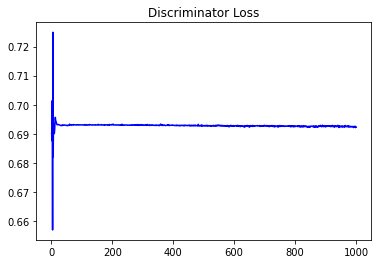

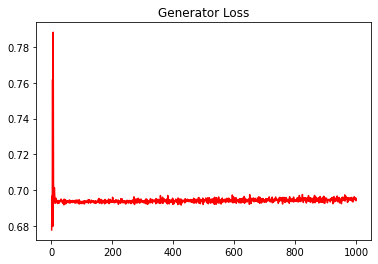

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11125352255947521


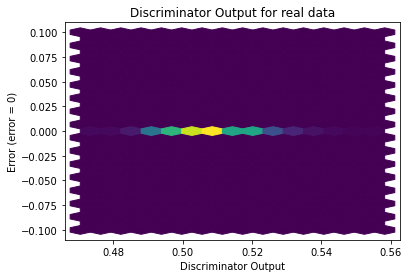

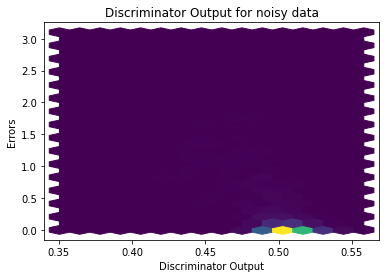

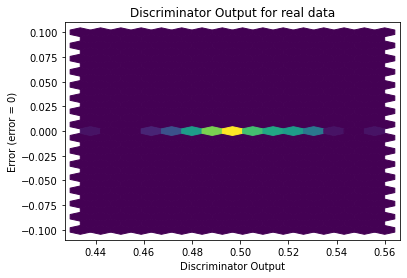

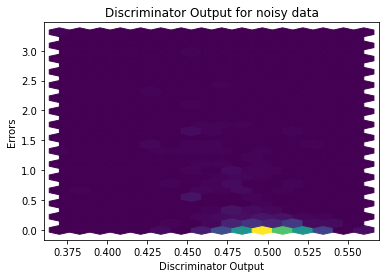

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


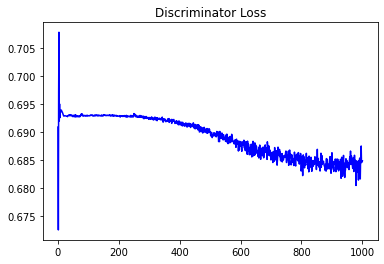

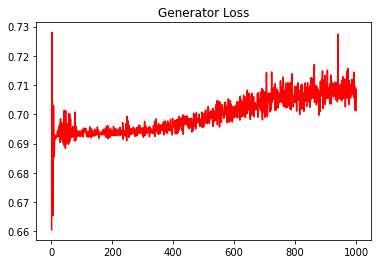

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08211759130966811


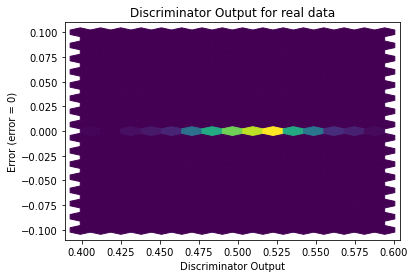

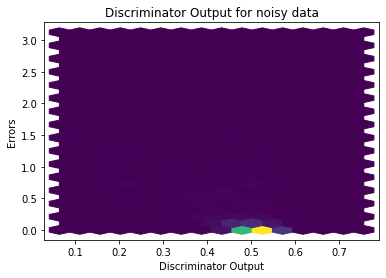

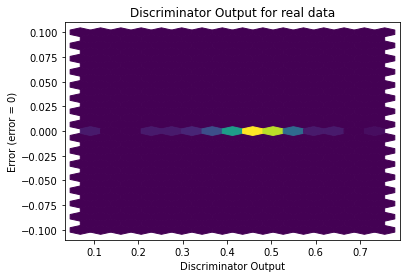

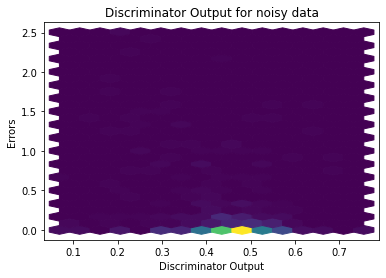

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1492]], requires_grad=True)
